In [2]:
import matplotlib.font_manager
del matplotlib.font_manager.weight_dict['roman']
matplotlib.font_manager._rebuild()

In [3]:


import pandas as pd
import numpy as np

from math import ceil

from matplotlib import pyplot as plt
import matplotlib
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams.update({'font.size': 21})
plt.rcParams["font.weight"] = 'light'
plt.rcParams["axes.labelweight"] = 'light'
plt.rcParams["font.family"] = ['Times New Roman']

In [4]:
b7_flux = np.transpose(np.genfromtxt('Be7_flux.txt',delimiter=','))
o15_spec = np.transpose(np.genfromtxt('O15_spectrum.txt',delimiter=','))
n13_spec = np.transpose(np.genfromtxt('N13_spectrum.txt',delimiter=','))


In [5]:
# For Be7, the Ejiri/Elliot paper gives a rate of 94.8 SNU for Be7. 
# Then, I just need to calculate what that would be in a realistic detector
# We assume the signature is two line-like enegy deposits, 104 keV and ~160 keV

threshold = 86
energy_avail = 861 #b7_flux[0]*1e3
first_state = 104.8
second_state = 517.9
third_state = 583

beta_energy = energy_avail - threshold - second_state

print('Detected energy deposits in Be7 capture on Xe-136')
print('Beta: {:.2f}'.format(beta_energy))
print('Gamma: {:.2f}'.format(second_state))

be7_rate_snu = 94.8

print('Be7 evts in 5tons natural, 5yr: {:.2F}'.format( be7_rate_snu * 1.e-36 * 5.e6/131. * 6.02e23 * 5*365*24*60*60 * 0.088 ))
print('Be7 evts in 3tons, 90%enr, 5yr: {:.2F}'.format( be7_rate_snu * 1.e-36 * 3.e6/131. * 6.02e23 * 5*365*24*60*60 * 0.9 ))
print('Be7 evts in 50tons natural, 5yr: {:.2F}'.format( be7_rate_snu * 1.e-36 * 50.e6/131. * 6.02e23 * 5*365*24*60*60 * 0.088 ))


Detected energy deposits in Be7 capture on Xe-136
Beta: 257.10
Gamma: 517.90
Be7 evts in 5tons natural, 5yr: 30.22
Be7 evts in 3tons, 90%enr, 5yr: 185.47
Be7 evts in 50tons natural, 5yr: 302.25


In [6]:
def trap_integral(x,y):
    
    bin_widths = (x[1:] - x[:-1])*1.e3
    bin_heights = (y[1:] + y[:-1])/2.
    return np.sum(bin_heights*bin_widths)
    

43
Total rate of O15 neutrinos: 3.93E+11
Above Xe136 threshold: 3.93E+11
Fraction above 104.8 level: 0.991
Fraction above 517.9 level: 0.835
Fraction above 517.9 level, plus 200 keV: 0.659
Possibly detectable in nEXO, 10yr: 14.24


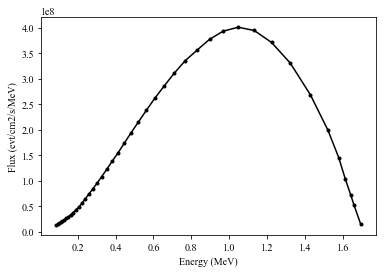

In [7]:
mask = o15_spec[0]*1000>threshold
print(np.sum(mask))

# Next, let's look at O15 and N13
plt.plot(o15_spec[0][mask],o15_spec[1][mask],'-k')
plt.plot(o15_spec[0][mask],o15_spec[1][mask],'.k')
plt.xlabel('Energy (MeV)')
plt.ylabel('Flux (evt/cm2/s/MeV)')
#plt.axis([1.5,2.,0.,0.5e8])

print('Total rate of O15 neutrinos: {:.2E}'.format(trap_integral(o15_spec[0],o15_spec[1])))
print('Above Xe136 threshold: {:.2E}'.format(trap_integral(o15_spec[0][mask],o15_spec[1][mask])))
o15_above_thresh = trap_integral(o15_spec[0][mask],o15_spec[1][mask])
mask = o15_spec[0]*1000>(threshold+first_state)
print('Fraction above 104.8 level: {:.3F}'.format(trap_integral(o15_spec[0][mask],o15_spec[1][mask])/o15_above_thresh))
mask = o15_spec[0]*1000>(threshold+second_state)
print('Fraction above 517.9 level: {:.3F}'.format(trap_integral(o15_spec[0][mask],o15_spec[1][mask])/o15_above_thresh))
mask = o15_spec[0]*1000>(threshold+second_state+200.)
print('Fraction above 517.9 level, plus 200 keV: {:.3F}'.format(trap_integral(o15_spec[0][mask],o15_spec[1][mask])/o15_above_thresh))

print('Possibly detectable in nEXO, 10yr: {:.2F}'.format(0.4 * 9.1 * 1.e-36 * 3.e6/131. * 6.02e23 * 10*365*24*60*60 * 0.9))


36
Total rate of n13 neutrinos: 4.96E+08
Above Xe136 threshold: 4.96E+11
Fraction above 104.8 level: 0.980
Fraction above 517.9 level: 0.629
Fraction above 517.9 level, plus 200 keV: 0.319
62.3909456552061


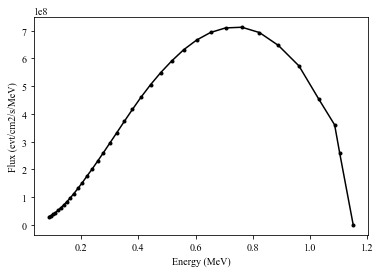

In [8]:
mask = n13_spec[0]*1000>threshold
print(np.sum(mask))

# Next, let's look at n13 and N13
plt.plot(n13_spec[0][mask],n13_spec[1][mask],'-k')
plt.plot(n13_spec[0][mask],n13_spec[1][mask],'.k')
plt.xlabel('Energy (MeV)')
plt.ylabel('Flux (evt/cm2/s/MeV)')
#plt.axis([1.5,2.,0.,0.5e8])

print('Total rate of n13 neutrinos: {:.2E}'.format(trap_integral(n13_spec[0],n13_spec[1]/1000.)))
print('Above Xe136 threshold: {:.2E}'.format(trap_integral(n13_spec[0][mask],n13_spec[1][mask])))
n13_above_thresh = trap_integral(n13_spec[0][mask],n13_spec[1][mask])
mask = n13_spec[0]*1000>(threshold+first_state)
print('Fraction above 104.8 level: {:.3F}'.format(trap_integral(n13_spec[0][mask],n13_spec[1][mask])/n13_above_thresh))
mask = n13_spec[0]*1000>(threshold+second_state)
print('Fraction above 517.9 level: {:.3F}'.format(trap_integral(n13_spec[0][mask],n13_spec[1][mask])/n13_above_thresh))
mask = n13_spec[0]*1000>(threshold+second_state+200)
print('Fraction above 517.9 level, plus 200 keV: {:.3F}'.format(trap_integral(n13_spec[0][mask],n13_spec[1][mask])/n13_above_thresh))


print(0.319 * 4.96E+8 * 2.73E-42 * 365*60*60*24 * 6e23/0.131*1000)





Fraction of B8 neutrinos between 1. and 2.8 MeV: 0.2208


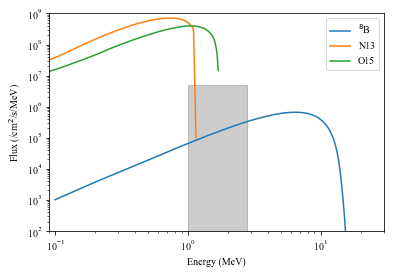

In [9]:
b8_spec = np.genfromtxt('B8_spectrum/data.txt')
plt.plot(b8_spec[:,0],b8_spec[:,1]*5e6,label='$^8$B')
plt.xlabel('Energy (MeV)')
plt.ylabel('Flux (/cm$^2$/s/MeV)')
plt.plot(n13_spec[0],n13_spec[1],label='N13')
plt.plot(o15_spec[0],o15_spec[1],label='O15')
plt.xscale('log')
plt.yscale('log')
plt.axis([0.09,30.,1.e2,1.e9])
x1 = np.ones(10)*1.
x2p8 = np.ones(10)*2.8
y = np.linspace(0.,5.e6,10)

plt.fill_betweenx(y,x1,x2p8,color=(0.,0.,0.,0.2))
#plt.axis([0.,16.,0.,5.e6])
plt.legend()
#plt.gca().ticklabel_format(axis='y',style='sci',scilimits=(0,0))

mask = (b8_spec[:,0]>6.0)&(b8_spec[:,0]<7.8)
print('Fraction of B8 neutrinos between 1. and 2.8 MeV: {:.4F}'.format(np.sum(b8_spec[mask,1])/np.sum(b8_spec[:,1])))
plt.savefig('B8_spectrum_xe124_roi.png',dpi=300,bbox_inches='tight')





In [15]:
print(trap_integral(b8_spec[:,0],b8_spec[:,1]*3.6e7))
mask = n13_spec[0]>(1.04+.355)
print(trap_integral(n13_spec[0][mask],n13_spec[1][mask]))
mask = o15_spec[0]>(1.04+0.355)
print(trap_integral(o15_spec[0][mask],o15_spec[1][mask]))


35999130600.0
0.0
40523053367.94858


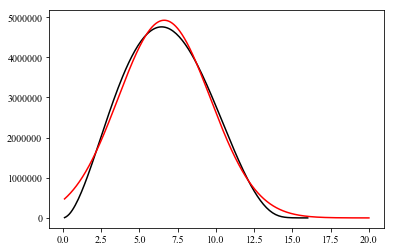

In [11]:
# Fit B8 spectrum to a gaussian
import scipy.optimize as opt

def gaussian(x,A,mu,sig):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

popt, pcov = opt.curve_fit(gaussian,b8_spec[:,0],b8_spec[:,1]*3.6e7,p0=(5.e6,8.,3.))

xfit = np.linspace(0.1,20.,10000)
yfit = gaussian(xfit,popt[0],popt[1],popt[2])
plt.plot(b8_spec[:,0],b8_spec[:,1]*3.6e7,'-k')
plt.plot(xfit,yfit,'-r')

Xe-128	0.231	0.00	0.0075	0.00
Xe-129	0.123	0.49	0.0051	0.02
Xe-130	0.203	0.01	0.0075	0.00
Xe-131	0.086	0.41	0.0040	0.02
Xe-132	0.167	0.12	0.0064	0.00
Xe-134	0.125	0.06	0.0052	0.00
Xe-136	0.076	0.06	0.0035	0.00


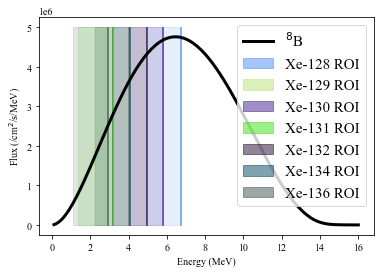

In [12]:
plt.plot(b8_spec[:,0],b8_spec[:,1]*3.6e7,'-k',label='$^8$B',linewidth=3)
plt.xlabel('Energy (MeV)')
plt.ylabel('Flux (/cm$^2$/s/MeV)')
plt.gca().ticklabel_format(axis='y',style='sci',scilimits=(0,0))


thresholds = [3.929, 1.197, 2.982, 0.355, 2.125, 1.233, 0.086]
isotopes = ['Xe-128','Xe-129','Xe-130','Xe-131','Xe-132','Xe-134','Xe-136']
avg_cross_sec =  [1.22E-42, 2.11E-41, 2.15E-42, 3.09E-41, 3.63E-42, 5.97E-42, 1.21E-41]
nat_abund = [0.019, 0.26401, 0.04071, 0.21232, 0.26909, 0.104356, 0.08857]

fractions = np.zeros(len(thresholds))
roi_fractions = np.zeros(len(thresholds))
rate_per_ton_year = np.zeros(len(thresholds))
rate_per_ton_year_roi = np.zeros(len(thresholds))

for i in range(0,len(thresholds)):
    col = (np.random.uniform(),np.random.uniform(),np.random.uniform())
    mask = (xfit>thresholds[i]+1.)&(xfit<thresholds[i]+2.8)
    fractions[i] = np.sum(yfit[mask])/np.sum(yfit)
    mask = (xfit>thresholds[i]+(2.8-0.01*2.8))&(xfit<thresholds[i]+(2.8+0.01*2.8))
    roi_fractions[i] = np.sum(yfit[mask])/np.sum(yfit)
    rate_per_ton_year[i] = avg_cross_sec[i]*5e6*fractions[i]*6e23/0.131*1000*(60*60*24*365)*nat_abund[i]
    rate_per_ton_year_roi[i] = avg_cross_sec[i]*5e6*roi_fractions[i]*6e23/0.131*1000*(60*60*24*365)*nat_abund[i]
    x1 = np.ones(10)*thresholds[i]+(2.8-0.01*2.8) #1.
    x2p8 = np.ones(10)*thresholds[i]+(2.8+0.01*2.8) #2.8
    y = np.linspace(0.,5.e6,10)
    plt.fill_betweenx(y,x1,x2p8,color=col,alpha=0.5,label='{} ROI'.format(isotopes[i]))
    x1 = np.ones(10)*thresholds[i]+1.
    x2p8 = np.ones(10)*thresholds[i]+2.8
    y = np.linspace(0.,5.e6,10)
    plt.fill_betweenx(y,x1,x2p8,alpha=0.15,color=col)
    #plt.axis([0.,16.,0.,5.e6])
    print('{}\t{:.3F}\t{:.2F}\t{:.4F}\t{:.2F}'.format(isotopes[i],fractions[i],rate_per_ton_year[i],roi_fractions[i],rate_per_ton_year_roi[i]))
    #print('{:.5F}'.format(roi_fractions[i]))
plt.legend(fontsize=15) 
plt.savefig('B8_spectrum_with_rois_4.png',dpi=300,bbox_inches='tight')


In [13]:
avg_cross_sec =  [2.11E-41, 2.15E-42, 3.09E-41, 3.63E-42, 5.97E-42, 1.21E-41]


In [20]:
3e-43 * 40523053367.94858/1000. * (1000./0.136 * 6.02e23 * 0.9) * (60*60*24*365)

1.5273202697781596

In [21]:
40523053367.94858/1000./1.e9

0.04052305336794858

In [27]:
4e8*0.5 * 3e-43 * (1000./0.136 * 6e23 * 0.9) * (60*60*24*365)

7.512988235294117

In [32]:
7.513 * 30

225.39